In [10]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import plotly.io as pio   
pio.kaleido.scope.mathjax = None
import seaborn as sns
import matplotlib.pyplot as plt
import os,sys
# set correct wd:
cwd = os.getcwd()
if not cwd.endswith('ANALYSIS'):
    os.chdir('./bin/ANALYSIS')
    sys.path.append(os.path.abspath('.'))
output_directory = '../../'
os.makedirs(f'{output_directory}/figures', exist_ok=True)

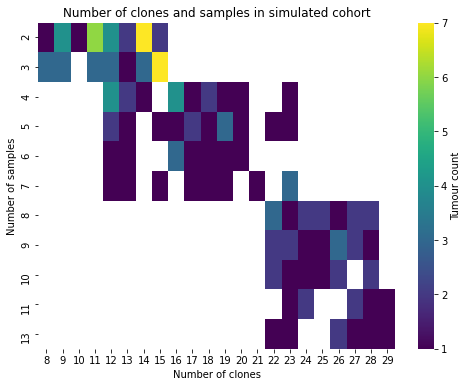

<Figure size 432x288 with 0 Axes>

In [11]:
# Supplementary figure 1: simulated cohort overview
pivot_table = pd.read_csv(f'{output_directory}/simulations/simulations_default/cohort_outputs/simulated_cohort_overview.csv',index_col=0)
mask = pivot_table == 0
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, cmap='viridis', annot=False, cbar_kws={'label': 'Tumour count'}, mask=mask)
plt.title('Number of clones and samples in simulated cohort')
plt.xlabel('Number of clones')
plt.ylabel('Number of samples')
plt.show()
plt.savefig(f'../../figures/Suppfig1a_simulated_cohort_overview.pdf')

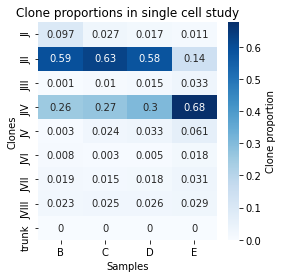

<Figure size 432x288 with 0 Axes>

In [12]:
# Supplementary figure 1: single cell clone proportions
selected_tumours = ['S0noise0.1']
input_data_directory = f'{output_directory}/single_cell/single_cell_default/patient_outputs'
cp_table = pd.read_csv(f'{input_data_directory}/cp_table.csv',index_col='clone')
cp_table = cp_table.round(3)
plt.figure(figsize=(4, 4))
plt.rcParams['font.family'] = 'Helvetica'
sns.heatmap(cp_table, cmap='Blues', annot=True, cbar_kws={'label': 'Clone proportion'})
plt.title('Clone proportions in single cell study')
plt.xlabel('Samples')
plt.ylabel('Clones')
plt.show()
plt.savefig(f'../../figures/Suppfig1b_single_cell_clone_proportions.pdf')

In [13]:
# Supplementary Figure 1: simulations example case:
import SIMULATIONS_make_example_case_heatmaps
tumour_id='LTXSIM127'
input_data_directory = f'{output_directory}/simulations/simulations_default/patient_outputs'
cohort_results_file = f'{output_directory}/simulations/simulations_default/cohort_outputs/combined.csv'
chr_table_file = f'{output_directory}/../_assets/chr_len.csv'
wgd_calls = f'{output_directory}/simulations/simulations_default/cohort_outputs/wgd_calls.csv'
wgd_calls = pd.read_csv(wgd_calls)
cohort_results = pd.read_csv(cohort_results_file)
tumour_input_directory = f'{input_data_directory}/{tumour_id}'
true = pd.read_csv(f'{tumour_input_directory}/copynumbers.csv')
true = SIMULATIONS_make_example_case_heatmaps.true_unify_format(true)
tumour_wgd_calls = wgd_calls[wgd_calls.tumour_id == tumour_id]
wgd_clones = list(tumour_wgd_calls[tumour_wgd_calls.GD > 0].clones)
alpaca_output = cohort_results[cohort_results.tumour_id==tumour_id]
alpaca_output = alpaca_output[alpaca_output.clone!='diploid']
heatmap_A = SIMULATIONS_make_example_case_heatmaps.plot_heatmap_with_tree_compare_with_true_solution_publication(alpaca_output=alpaca_output,input_data_directory=tumour_input_directory, chr_table_file=chr_table_file,wgd_clones=wgd_clones, max_cpn_cap=8, allele='A', true_solution_df=true, plot_comparison=True, sort_alleles=False)
heatmap_A.fig.write_image(f'../../figures/Suppfig1c_ALPACA_simulations_{tumour_id}_A_example_heatmap.pdf')
heatmap_B = SIMULATIONS_make_example_case_heatmaps.plot_heatmap_with_tree_compare_with_true_solution_publication(alpaca_output=alpaca_output,input_data_directory=tumour_input_directory, chr_table_file=chr_table_file,wgd_clones=wgd_clones, max_cpn_cap=8, allele='B', true_solution_df=true, plot_comparison=True, sort_alleles=False)
heatmap_B.fig.write_image(f'../../figures/Suppfig1d_ALPACA_simulations_{tumour_id}_B_example_heatmap.pdf')

In [14]:
# Supplementary Figure 1: simple model example case:
import SIMULATIONS_make_example_case_heatmaps
tumour_id='LTXSIM127'
input_data_directory = f'{output_directory}/simulations/simple_model_default/patient_outputs'
cohort_results_file = f'{output_directory}/simulations/simple_model_default/cohort_outputs/combined.csv'
chr_table_file = f'{output_directory}/../_assets/chr_len.csv'
cohort_results = pd.read_csv(cohort_results_file)
tumour_input_directory = f'{input_data_directory}/{tumour_id}'
true = pd.read_csv(f'{tumour_input_directory}/copynumbers.csv')
true = SIMULATIONS_make_example_case_heatmaps.true_unify_format(true)
wgd_clones = []
alpaca_output = cohort_results[cohort_results.tumour_id==tumour_id]
alpaca_output = alpaca_output[alpaca_output.clone!='diploid']
heatmap_A = SIMULATIONS_make_example_case_heatmaps.plot_heatmap_with_tree_compare_with_true_solution_publication(alpaca_output=alpaca_output,input_data_directory=tumour_input_directory, chr_table_file=chr_table_file,wgd_clones=wgd_clones, max_cpn_cap=8, allele='A', true_solution_df=true, plot_comparison=True, sort_alleles=False)
heatmap_A.fig.write_image(f'../../figures/Suppfig1e_simple_model_{tumour_id}_A_example_heatmap.pdf')
heatmap_B = SIMULATIONS_make_example_case_heatmaps.plot_heatmap_with_tree_compare_with_true_solution_publication(alpaca_output=alpaca_output,input_data_directory=tumour_input_directory, chr_table_file=chr_table_file,wgd_clones=wgd_clones, max_cpn_cap=8, allele='B', true_solution_df=true, plot_comparison=True, sort_alleles=False)
heatmap_B.fig.write_image(f'../../figures/Suppfig1f_simple_model_{tumour_id}_B_example_heatmap.pdf')